In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data
----------

In [108]:
df = pd.read_csv('../Notebooks/results_compiled.csv', )
#DATASET = 'MNIST'
#df = df[df.Dataset == DATASET]
df = df[df.Backprop == 'backprop']
df.head()
print(df.shape)

(477, 19)


## Clean Up and Adding Derived Columns
---------

In [109]:
df['ModelType'].unique()

array(['kan_2layers', 'kan_3layers', 'kan_4layers', 'mlpWide_2layers',
       'mlpWide_3layers', 'mlpWide_4layers', 'mlp_2layers', 'mlp_3layers',
       'mlp_4layers'], dtype=object)

In [110]:


df['Optimizer'] = pd.Series([x for x in df.Optimizer])
df['ModelType'] = df['Model'] + "_" + df['Num_layers']
df['Efficiency'] = (df['Best_test'] / (df['Best_test_at'] + 1))*np.sqrt((1e9 - df['Num_parameters']))

df.sort_values('Best_test')[df.ModelType == 'kan_4layers']


C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_15556\1345312062.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values('Best_test')[df.ModelType == 'kan_4layers']


,Unnamed: 0,Dataset,Backprop,Model,Num_layers,Batchsize,LearningRate,TotalEpochs,Num_parameters,Optimizer,Best_train,Best_test,Best_test_at,Avg_time,Initialization,AvgGenError,ModelType,ID,Efficiency
51,51,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,SGDM,0.780212,0.516113,9,24.021583,kaiming_normal,0.147034,kan_4layers,9000,1600.750104
53,53,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,SGDM,0.829936,0.516724,9,23.918123,orthogonal_,0.155686,kan_4layers,9000,1602.643072
56,56,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,SGD,0.994853,0.519775,48,23.981727,orthogonal_,0.476357,kan_4layers,9000,329.001690
44,44,CIFAR,backprop,kan,4layers,2048,0.0005,98,38040084,SGDM,0.996338,0.520142,47,24.041841,orthogonal_,0.476564,kan_4layers,9000,336.092514
48,48,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,Adam,0.980082,0.520508,36,23.994798,kaiming_normal,0.345511,kan_4layers,9000,436.318880
52,52,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,SGDM,0.806376,0.520752,21,23.834369,kaiming_uniform,0.143369,kan_4layers,9000,734.153227
50,50,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,Adam,0.980815,0.527222,8,23.975978,orthogonal_,0.344483,kan_4layers,9000,1816.892598
54,54,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,SGD,0.995341,0.528442,39,24.010846,kaiming_normal,0.469487,kan_4layers,9000,409.747349
42,42,CIFAR,backprop,kan,4layers,2048,0.0005,98,38040084,SGDM,0.996623,0.528564,26,24.078835,kaiming_normal,0.469089,kan_4layers,9000,607.173312
49,49,CIFAR,backprop,kan,4layers,2048,0.0050,98,38040084,Adam,0.979065,0.531372,19,24.041334,kaiming_uniform,0.343639,kan_4layers,9000,824.038001


In [111]:
df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'CIFAR')), 'Num_parameters'] =  78676490
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'CIFAR')), 'Num_parameters'] =  170442250
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'CIFAR')), 'Num_parameters'] =  380188170

df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'MNIST')), 'Num_parameters'] = 255050
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'MNIST')), 'Num_parameters'] = 712650
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'MNIST')), 'Num_parameters'] = 2037450


df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'Fashion')), 'Num_parameters'] = 255050
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'Fashion')), 'Num_parameters'] = 712650
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'Fashion')), 'Num_parameters'] = 2037450

In [112]:
df['Best_test'] = df['Best_test'].astype('float32')

## Plotting Test Accuracy against Parameters
-----------

kan_
                Best_test
Num_parameters           
254080           0.952148
525440           0.965332
1109120          0.968506
---
mlp_
                Best_test
Num_parameters           
25514            0.967285
52842            0.975586
111594           0.979492
---
mlpW
                Best_test
Num_parameters           
255050           0.983887
712650           0.985840
2037450          0.986572
---


C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_15556\411121719.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()#bbox_to_anchor=(1.01, 1.02))


Text(0.5, 1.0, 'Test Acc under Backprop Training Schemes (CIFAR)')

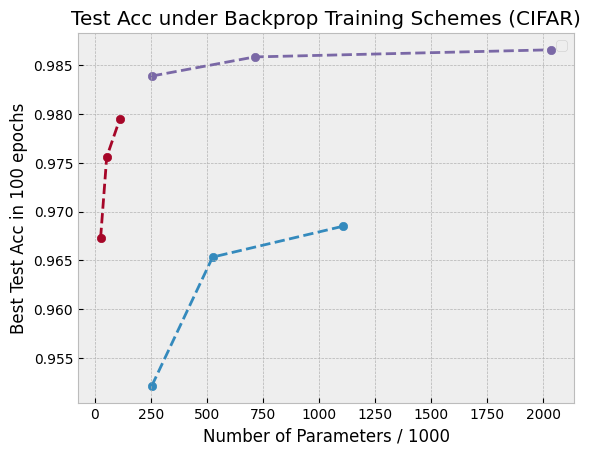

In [113]:
plt.style.use( 'bmh')

fig, axes = plt.subplots()
dataset = 'MNIST'
colors = [[0,0,.1], [0,0,.5], [0,0,1]]
for ma in ['kan_', 'mlp_', 'mlpW']:
    print(ma)
    sq = df[df.ModelType.apply(lambda x: x[:4]) ==ma]
    sq = sq[sq.Dataset == dataset]
    sq = sq[['ModelType', 'Num_parameters', 'Best_test']]; label = list(sq.ModelType)[0]
    sq2 = sq.groupby('Num_parameters').max()
    sq2 = sq2[['Best_test']]; print(sq2)
    axes.scatter(sq2.index/1000, sq2.Best_test)
    axes.plot(sq2.index/1000, sq2.Best_test, linestyle = '--')
    #axes.plot(sq2.index/1000, sq2.Best_test, alpha = 1, linestyle='--', linewidth = 1.5, marker = 'o')
    print('---')


#for model in set(np.unique(df['ModelType'])):
#    sa = df[(df.ModelType ==model)]
#    axes.plot(np.min(sa.Num_parameters/1000), np.max(sa.Best_test), label = model)

#plt.ylim(0.8, 1)
plt.xlabel("Number of Parameters / 1000")
plt.ylabel("Best Test Acc in 100 epochs")
plt.legend()#bbox_to_anchor=(1.01, 1.02))
plt.title("Test Acc under Backprop Training Schemes (" + DATASET + ")")


## Plotting Efficiency and Epoch Times
-------

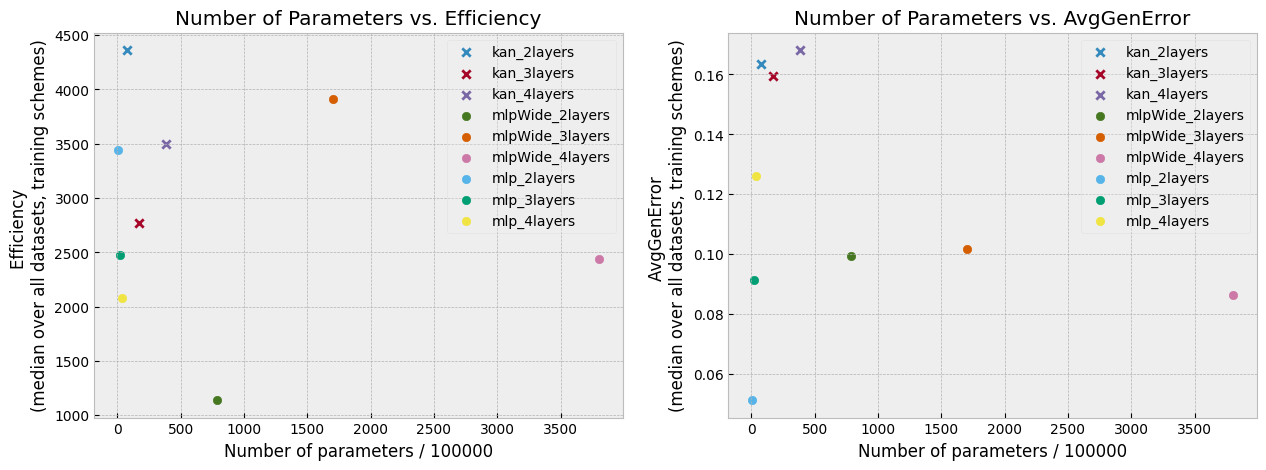

In [114]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5)); idx = 0
for metric in ['Efficiency', 'AvgGenError']:
    for model in sorted(list(set(np.unique(df['ModelType'])))):
        sa = df[(df.ModelType ==model)]
        mark = 'o' if 'mlp' in model else 'x'
        axes[idx].scatter(np.max(sa.Num_parameters/100000), np.mean(sa[metric]), marker = mark, label = model, alpha = 1)
        axes[idx].set_title("Number of Parameters vs. " + metric)
        axes[idx].set_xlabel("Number of parameters / 100000")
        axes[idx].set_ylabel(metric + " \n(median over all datasets, training schemes)")
        axes[idx].legend(fancybox=True, framealpha=0.3)
    idx += 1

## Bar Plot of Best Achieved Model Performance Under Any Training Scheme
------------

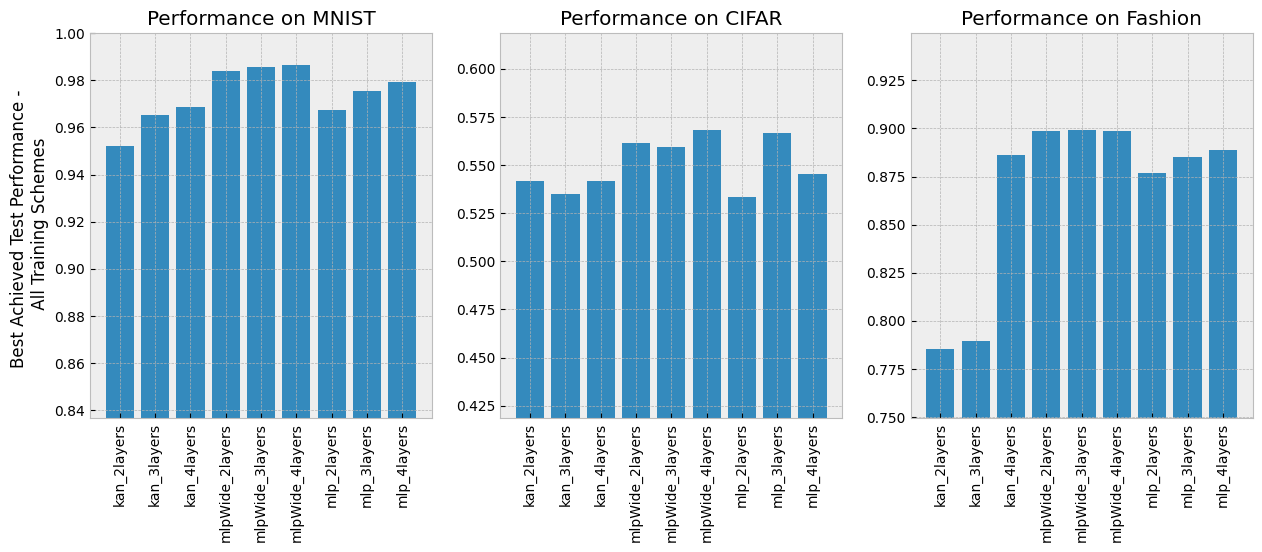

In [115]:
df = pd.read_csv('../Notebooks/results_compiled.csv', )
i = 0
fig, axes = plt.subplots(1,3,figsize = (15,5))
for DATASET in ['MNIST', 'CIFAR', 'Fashion']:
    zs = df[df.Dataset == DATASET]
    zs = zs.groupby("ModelType", group_keys=True)[['Best_test']].max()
    axes[i].bar(zs.index, zs.Best_test);
    
    maxperf = np.max(zs.Best_test)
    axes[i].set_ylim(maxperf - 0.15, np.min([1.0, maxperf + 0.05]))
    #fig.xticks(rotation = 90)
    axes[i].tick_params('x', labelrotation=90)
    if i == 0:
        axes[i].set_ylabel("Best Achieved Test Performance - \n All Training Schemes")
    axes[i].set_title("Performance on " + DATASET); i+=1

[Text(0, 1, 'kan_2layers'),
 Text(0, 2, 'kan_3layers'),
 Text(0, 3, 'kan_4layers'),
 Text(0, 4, 'mlpWide_2layers'),
 Text(0, 5, 'mlpWide_3layers'),
 Text(0, 6, 'mlpWide_4layers'),
 Text(0, 7, 'mlp_2layers'),
 Text(0, 8, 'mlp_3layers'),
 Text(0, 9, 'mlp_4layers')]

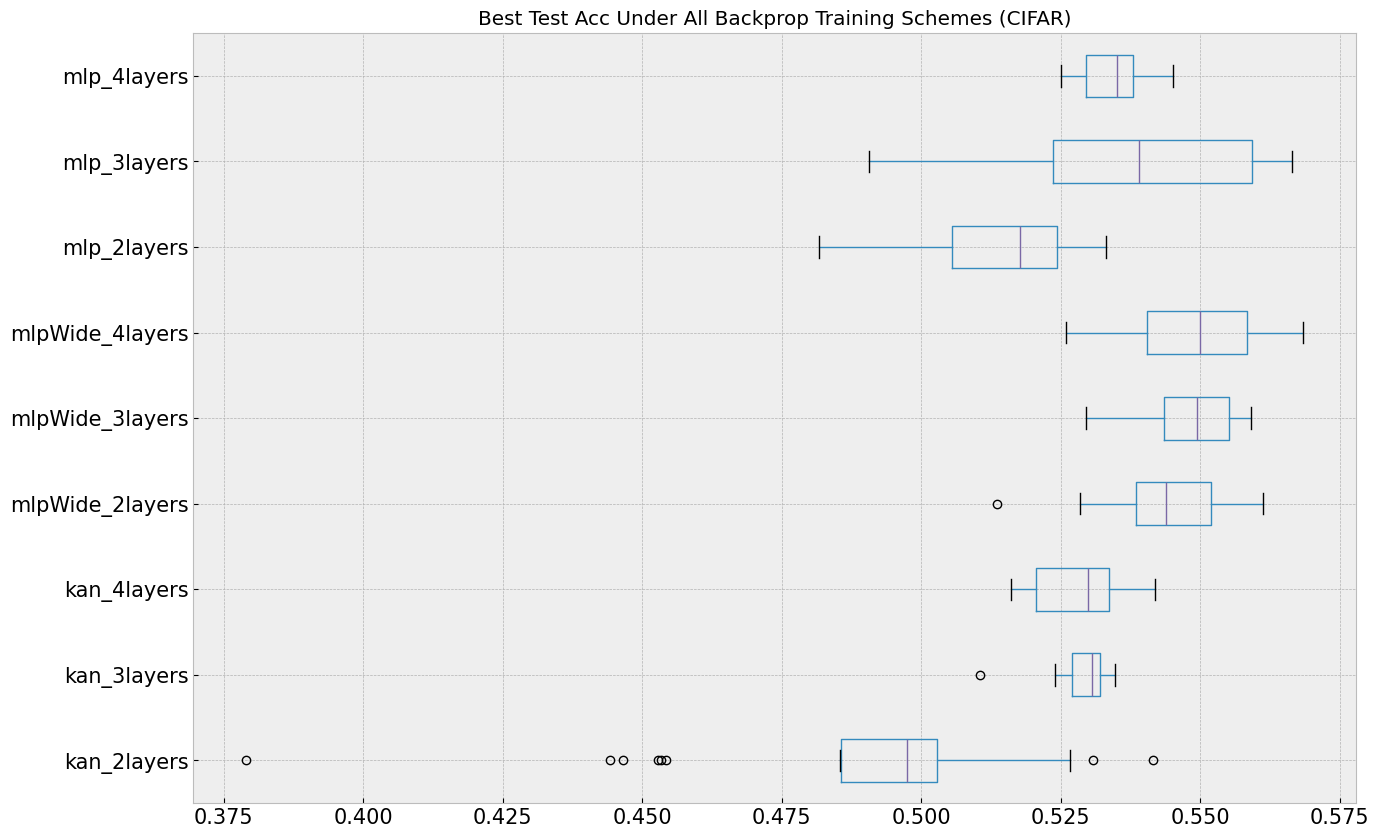

In [116]:
DATASET = 'CIFAR'
zs = df[df.Dataset == DATASET]
zs = zs.groupby("ModelType", group_keys=True)[['Best_test']]


def tick_tfm(lab, zs):
        return(lab + " [" + str(np.max(zs[zs.ModelType == lab].Num_parameters))) + "]"

zs.boxplot(figsize = (15,10), fontsize = 15,  subplots = 0, vert=False)
#plt.yticks(rotation = 90)
plt.title("Best Test Acc Under All Backprop Training Schemes (" + DATASET + ")")
#maxperf = np.max(zs.max())
#minperf = np.min(zs.min())
#plt.ylim(minperf - 0.01, np.min([1.0, maxperf + 0.05]))
ax = plt.gca()
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = [l.split(",")[0].replace("(","") for l in labels]
#labels = [tick_tfm(x, df[df.Dataset == 'CIFAR']) for x in labels]
ax.set_yticklabels(labels)
